### Illustrating words in given clusters using WordClouds

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Read the data
worldnews_clustered = pd.read_csv('data/worldnews_clustered.csv')
worldnews_clustered.head()

,comment_id,created_date,subreddit_id,search_query,post_id,post_title,comment_original,comment_processed,comment_no_stopwords,upvotes,post_url,comment_url,lix_score,sentiment_score,hierarchical_cluster,kmeans_cluster,dbscan_cluster
0,lu0s0st,2024-10-27 15:32:33,politics,Israel,1gdcy25,Bernie Sanders to voters skipping presidential...,"News flash, Trump is worse on every single vot...","news flash, trump is worse on every single vot...","news flash, trump worse every single voting is...",8981,https://www.reddit.com/r/politics/comments/1gd...,https://www.reddit.com/r/politics/comments/1gd...,3.250000,-0.230769,1,0,-1
1,lu0nkvc,2024-10-27 15:08:10,politics,Israel,1gdcy25,Bernie Sanders to voters skipping presidential...,Protest non-voters are some of the worst type ...,protest non voters are some of the worst type ...,protest non voters worst type privileged peopl...,4186,https://www.reddit.com/r/politics/comments/1gd...,https://www.reddit.com/r/politics/comments/1gd...,40.104651,-0.162791,1,2,-1
2,lu0t4k2,2024-10-27 15:38:28,politics,Israel,1gdcy25,Bernie Sanders to voters skipping presidential...,"Just fucking vote. Local, state and federal. \...","just fucking vote. local, state and federal. ...","fucking vote. local, state federal. world mess...",3971,https://www.reddit.com/r/politics/comments/1gd...,https://www.reddit.com/r/politics/comments/1gd...,14.773810,-0.095238,1,2,-1
3,lu0pgoz,2024-10-27 15:18:36,politics,Israel,1gdcy25,Bernie Sanders to voters skipping presidential...,Trump wants Israel to annex Palestine.\n\nHarr...,trump wants israel to annex palestine. harris...,trump wants israel annex palestine. harris wan...,1394,https://www.reddit.com/r/politics/comments/1gd...,https://www.reddit.com/r/politics/comments/1gd...,33.000000,0.083333,0,1,-1
4,lu1sukf,2024-10-27 18:38:06,politics,Israel,1gdcy25,Bernie Sanders to voters skipping presidential...,This is just objectively true.\n\n&nbsp;\n\nIf...,this is just objectively true. nbsp if you...,objectively true. nbsp support harris probably...,887,https://www.reddit.com/r/politics/comments/1gd...,https://www.reddit.com/r/politics/comments/1gd...,40.945225,-0.097561,0,1,-1


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

def extract_and_save_tfidf_terms(data, cluster_column, text_column, top_print=5):
    all_tfidf_terms = {}
    tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
    clusters = data[cluster_column].unique()
    
    for cluster in clusters:
        # Filter data for the specific cluster
        cluster_data = data[data[cluster_column] == cluster]
        # Fit and transform TF-IDF on the cluster text
        tfidf_matrix = tfidf.fit_transform(cluster_data[text_column])
        feature_names = tfidf.get_feature_names_out()
        tfidf_scores = tfidf_matrix.sum(axis=0).A1
        tfidf_df = pd.DataFrame({
            'term': feature_names,
            'score': tfidf_scores
        }).sort_values(by='score', ascending=False)
        
        # Save all terms and scores for this cluster
        all_tfidf_terms[cluster] = dict(zip(tfidf_df['term'], tfidf_df['score']))
        
        # Print a few top terms as an example
        print(f"\nCluster {cluster}: Top {top_print} TF-IDF Terms (as an example):\n")
        print(tfidf_df.head(top_print).to_string(index=False))
    
    return all_tfidf_terms


tfidf_terms = extract_and_save_tfidf_terms(worldnews_clustered, 'hierarchical_cluster', 'comment_no_stopwords', top_print=5)



Cluster 1: Top 5 TF-IDF Terms (as an example):

   term    score
  biden 1.008830
fucking 0.931041
  going 0.890325
   want 0.863354
  would 0.829618

Cluster 0: Top 5 TF-IDF Terms (as an example):

  term     score
israel 76.794258
 trump 47.086590
 biden 46.790860
people 42.746710
  like 36.750851

Cluster 2: Top 5 TF-IDF Terms (as an example):

    term    score
    july 0.603023
 finally 0.447214
     got 0.447214
 popular 0.447214
remember 0.447214


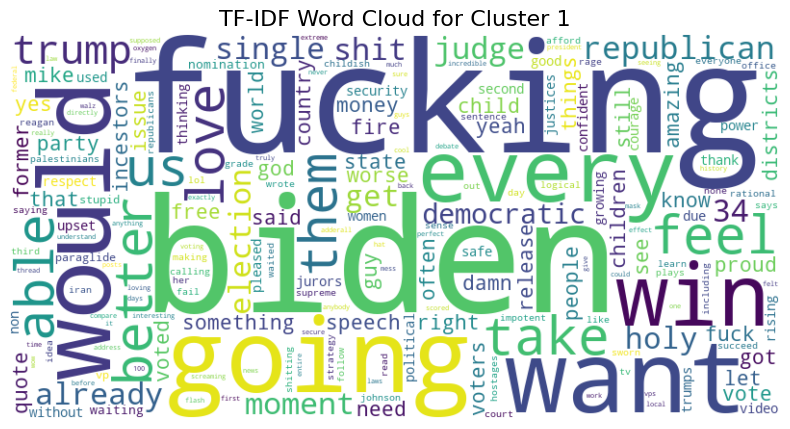

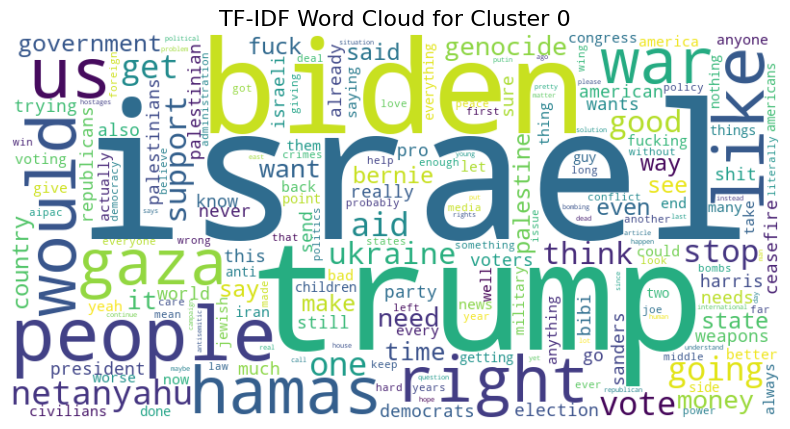

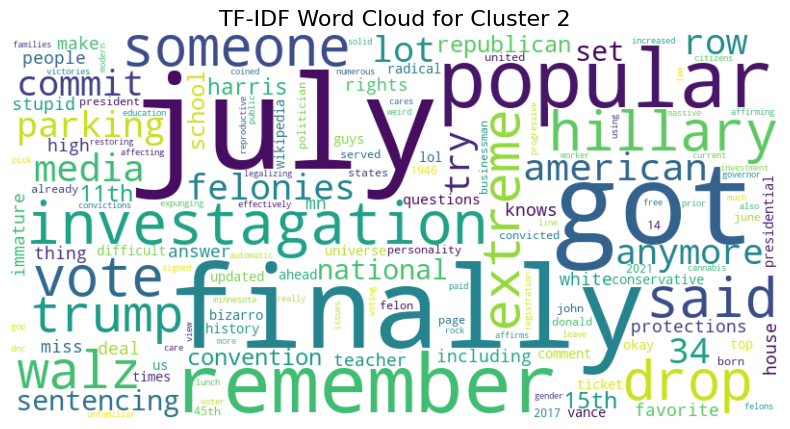

In [9]:
def generate_wordclouds_from_saved_terms(tfidf_terms):
    for cluster, tfidf_dict in tfidf_terms.items():
        # Generate a word cloud using TF-IDF scores
        wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(tfidf_dict)
        
        # Plot the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"TF-IDF Word Cloud for Cluster {cluster}", fontsize=16)
        plt.show()

generate_wordclouds_from_saved_terms(tfidf_terms)